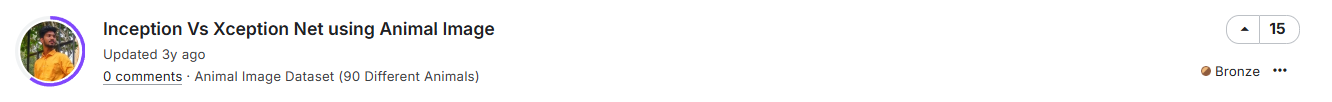

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dropout, Dense, Flatten, BatchNormalization, LeakyReLU, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception

import cv2

from tqdm import tqdm
import os
import gc

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings("ignore")

c:\Users\Leaper\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\Users\Leaper\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
images = []
labels = []

main_directory = r'D:\code_study\ML_CODE\dataSets\Classification\Animal_Image_Dataset_90DifferentAnimals\animals\animals'
main_directory = main_directory.replace("\\", "/")

for animal in tqdm(os.listdir(main_directory)):
    for i in range(len(os.listdir(main_directory + '/' + animal))):
        if i < 40:
            img = cv2.imread(main_directory + '/' + animal + '/' + os.listdir(main_directory + '/' + animal)[i])
            resized_img = cv2.resize(img,(229,229))
            resized_img = resized_img / 255.0
            images.append(resized_img)
            labels.append(animal)

images = np.array(images,dtype = 'float32')

100%|██████████| 90/90 [00:22<00:00,  4.07it/s]


In [4]:
le = preprocessing.LabelEncoder()
le.fit(labels)
class_names = le.classes_
labels = le.transform(labels)

labels = np.array(labels, dtype = 'uint8')
labels = np.resize(labels, (len(labels),1))

In [5]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.33, stratify = labels)

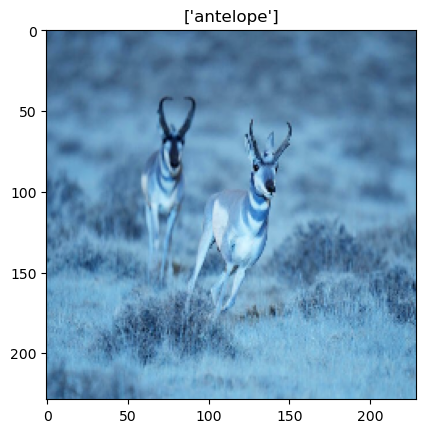

In [6]:
n = np.random.randint(0,np.shape(train_images)[0])

plt.imshow(train_images[n])
plt.title(str(le.inverse_transform([train_labels[n]])))
plt.show()

In [7]:
inception_model = Sequential()

inception_base_model = InceptionV3(include_top = False, weights = "imagenet", input_shape = (229,229,3))
print(f'Number of layers in InceptionV3 : {len(inception_base_model.layers)}')

for layer in inception_base_model.layers[:]:
    layer.trainable = False
    
for layer in inception_base_model.layers[250:]:
    layer.trainable = True
    
inception_model.add(inception_base_model)

inception_model.add(GlobalAveragePooling2D())

inception_model.add(Dense(units = 90, activation = 'softmax'))

inception_model.summary()

early_stopping = EarlyStopping( monitor = 'val_accuracy', mode = 'max', min_delta = 1,patience = 20,restore_best_weights = True,verbose = 0)

# Compile
inception_model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.0001) , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

# Train
inception = inception_model.fit(train_images, train_labels, batch_size = 64, epochs = 10, callbacks = [early_stopping], validation_split = 0.2)

Number of layers in InceptionV3 : 311
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 90)                184410    
Total params: 21,987,194
Trainable params: 10,725,850
Non-trainable params: 11,261,344
_________________________________________________________________
Epoch 1/10
31/31 [==============================] - 35s 443ms/step - loss: 3.5555 - accuracy: 0.3092 - val_loss: 1.2513 - val_accuracy: 0.7205
Epoch 2/10
31/31 [==============================] - 8s 269ms/step - loss: 0.8063 - accuracy: 0.9422 - val_loss: 0.7832 - val_accuracy: 0.8075
Epoch 3/10
31/31 [========================

In [8]:
inception_predictions = inception_model.predict(test_images)
inception_predictions = np.argmax(inception_predictions,axis = 1)

In [9]:
xception_model = Sequential()

xception_base_model = Xception(include_top = False, weights = "imagenet", input_shape = (229,229,3))
print(f'Number of layers in Xception : {len(xception_base_model.layers)}')

for layer in xception_base_model.layers[:]:
    layer.trainable = False
    
for layer in xception_base_model.layers[90:]:
    layer.trainable = True

xception_model.add(xception_base_model)

xception_model.add(GlobalAveragePooling2D())

xception_model.add(Dense(units = 90, activation = 'softmax'))

xception_model.summary()

early_stopping = EarlyStopping( monitor = 'val_accuracy', mode = 'max', min_delta = 1,patience = 20,restore_best_weights = True,verbose = 0)

# Compile
xception_model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.0001) , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

# Train
xception = xception_model.fit(train_images, train_labels, batch_size = 64, epochs = 10, callbacks = [early_stopping], validation_split = 0.2)

Number of layers in Xception : 132
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 90)                184410    
Total params: 21,045,890
Trainable params: 11,276,730
Non-trainable params: 9,769,160
_________________________________________________________________
Epoch 1/10
31/31 [==============================] - 30s 780ms/step - loss: 4.1810 - accuracy: 0.1760 - val_loss: 2.8168 - val_accuracy: 0.4907
Epoch 2/10
31/31 [==============================] - 20s 643ms/step - loss: 2.4827 - accuracy: 0.7660 - val_loss: 1.6797 - val_accuracy: 0.6356
Epoch 3/10
31/31 [=========================

In [10]:
xception_predictions = xception_model.predict(test_images)
xception_predictions = np.argmax(xception_predictions,axis = 1)

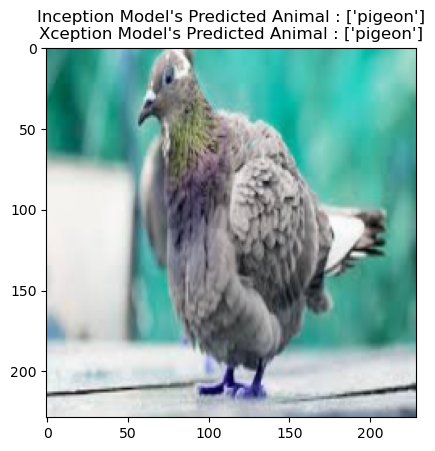

In [11]:
n = np.random.randint(0,np.shape(test_images)[0])

plt.imshow(test_images[n])
plt.title("Inception Model's Predicted Animal : " + str(le.inverse_transform([inception_predictions[n]])) + '\n' + "Xception Model's Predicted Animal : " + str(le.inverse_transform([xception_predictions[n]])))
plt.show()

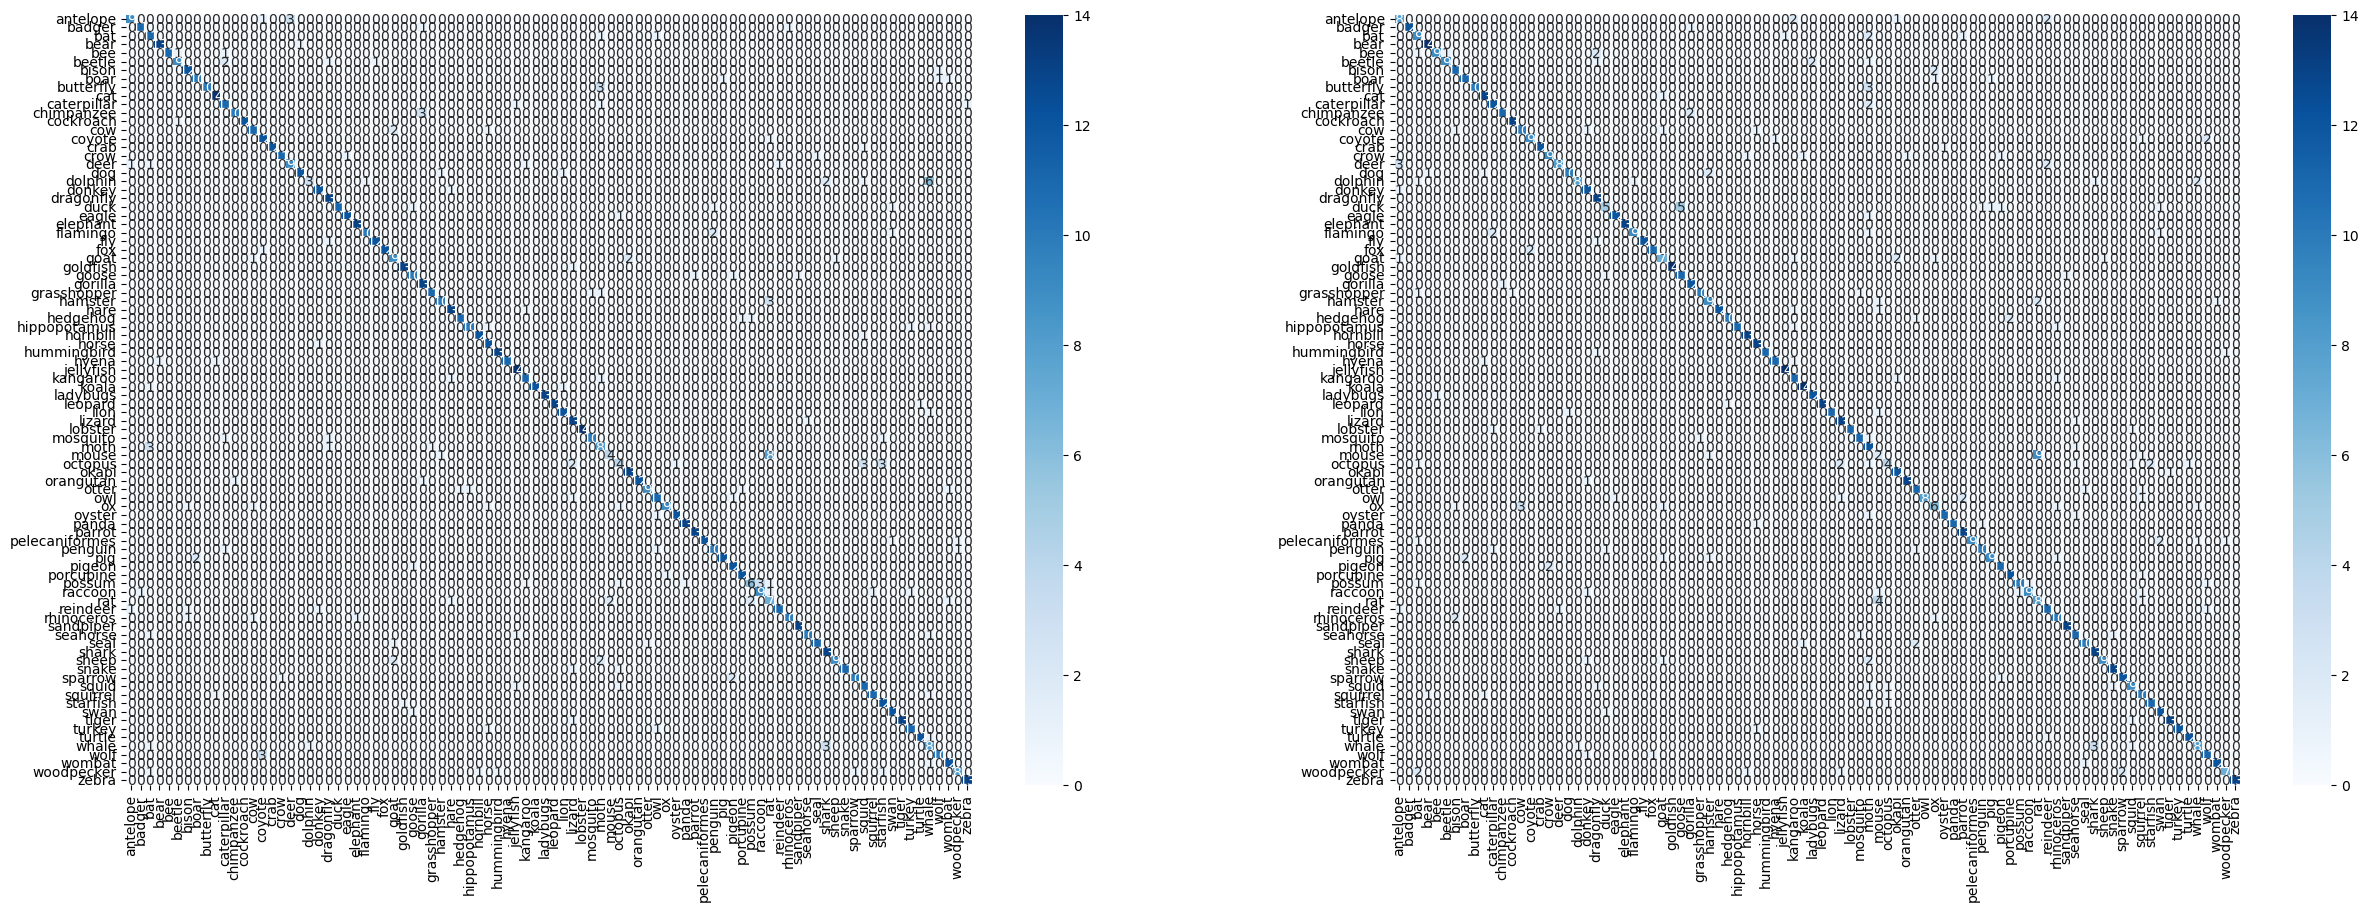

In [12]:
inception_cm = confusion_matrix(test_labels, inception_predictions)
xception_cm = confusion_matrix(test_labels, xception_predictions)

plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
sns.heatmap(inception_cm,cmap = 'Blues',annot = True, xticklabels = class_names, yticklabels = class_names)

plt.subplot(1,2,2)
sns.heatmap(xception_cm,cmap = 'Blues',annot = True, xticklabels = class_names, yticklabels = class_names)

plt.show()

In [13]:
def scores(cm):
    p = {}
    r = {}
    f1 = {}
    
    for i in range(len(cm)):
        p[i] = cm[i,i] / sum(cm[:,i])
        r[i] = cm[i,i] / sum(cm[i,:])
        f1[i] = 2 * (cm[i,i] / sum(cm[:,i])) * (cm[i,i]/sum(cm[i,:])) / ((cm[i,i] / sum(cm[:,i])) + (cm[i,i]/sum(cm[i,:])))
    
    return p,r,f1     

In [14]:
i_p,i_r,i_f1 = scores(inception_cm)
x_p,x_r,x_f1 = scores(xception_cm)

In [15]:
Precision = {
    'Inception Precision' : i_p,
    'Xception Precision' : x_p
}

Precision = pd.DataFrame(Precision)
Precision

,Inception Precision,Xception Precision
0,0.818182,0.571429
1,0.916667,1.000000
2,0.578947,0.529412
3,0.928571,0.875000
4,1.000000,0.900000
...,...,...
85,0.400000,0.666667
86,0.833333,0.733333
87,0.800000,0.923077
88,0.800000,0.777778


In [16]:
Recall = {
    'Inception Recall' : i_r,
    'Xception Recall' : x_r
}

Recall = pd.DataFrame(Recall)

Recall

,Inception Recall,Xception Recall
0,0.692308,0.615385
1,0.846154,0.923077
2,0.846154,0.692308
3,0.928571,1.000000
4,0.846154,0.692308
...,...,...
85,0.615385,0.615385
86,0.769231,0.846154
87,0.923077,0.923077
88,0.615385,0.538462


In [17]:
F1_score = {
    'Inception F1_score' : i_f1,
    'Xception F1_score' : x_f1
}

F1_score = pd.DataFrame(F1_score)
F1_score

,Inception F1_score,Xception F1_score
0,0.750000,0.592593
1,0.880000,0.960000
2,0.687500,0.600000
3,0.928571,0.933333
4,0.916667,0.782609
...,...,...
85,0.484848,0.640000
86,0.800000,0.785714
87,0.857143,0.923077
88,0.695652,0.636364


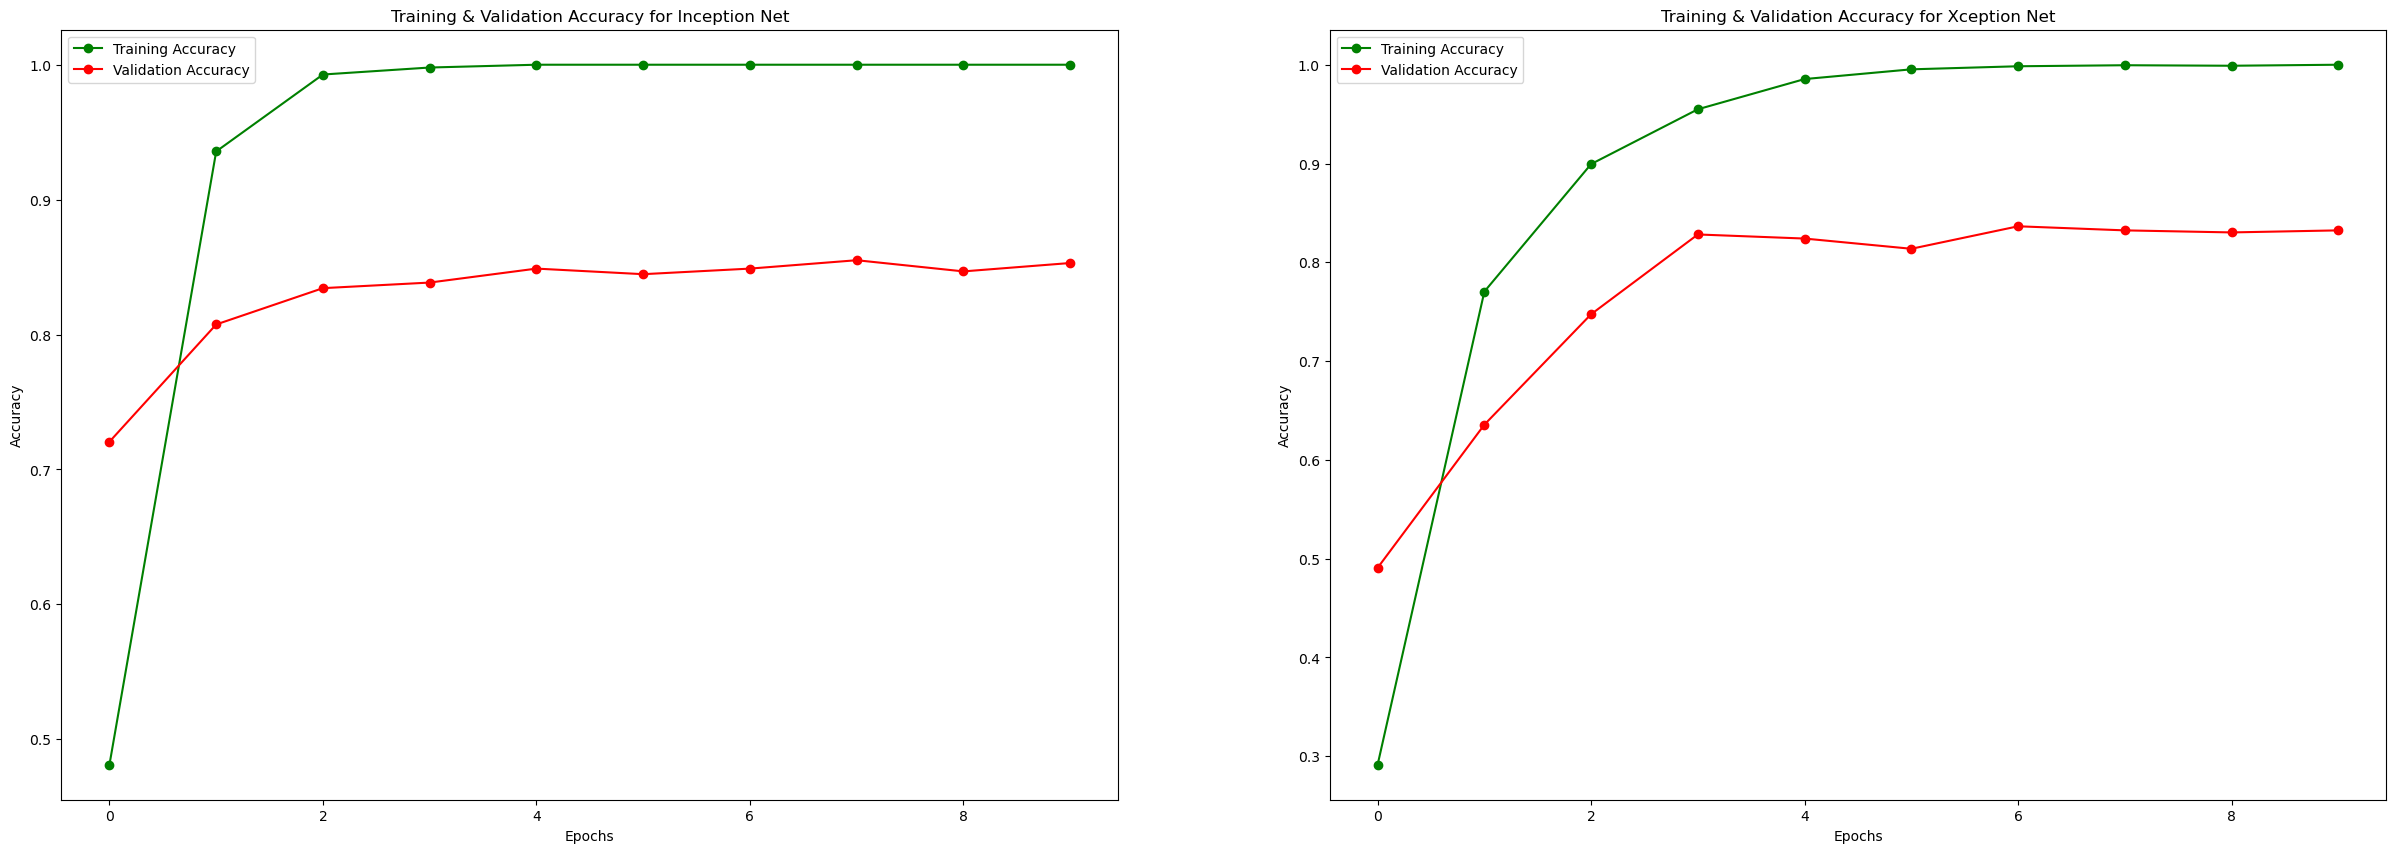

In [18]:
plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
i_train_acc = inception.history['accuracy']
i_val_acc = inception.history['val_accuracy']
i_epoch = [i for i in range(len(i_val_acc))]
plt.plot(i_epoch , i_train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(i_epoch, i_val_acc , 'ro-' , label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy for Inception Net')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
x_train_acc = xception.history['accuracy']
x_val_acc = xception.history['val_accuracy']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy for Xception Net')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()